# Classification of short political articles collected from several news/opinions websites 
# ** By Y. Kostrov
***

***
# Overview
 In this project, I create a model that will classify political articles into three categories consisting
  "left", "right", and "center".

 During the analysis:
 1.  I will do explaratory .
 2. I will build a Baseline Model from scratch.
 I will check the performance of the baseline model.
 I will build a Transfer Learning Model based on the VGG19 architecture.
 I will check the performance of the transfer learning model.
I will compare the results of the beforementioned models to choose the better of the two.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

In [2]:
df = pd.read_csv("data/test_2.csv")
df.head()

,article,label
0,Mental health professionals are no substitute ...,right
1,Merrick Garland's focus on school board meetin...,right
2,The president has yet to clarify what victory ...,right
3,"To hear President Joe Biden tell it, the Ameri...",right
4,The mainstream media's honeymoon with Presiden...,right


In [3]:
df.article = df.article.apply(lambda x: x.replace("SHARE",""))
df.article = df.article.apply(lambda x: x.lower())
df.head()

,article,label
0,mental health professionals are no substitute ...,right
1,merrick garland's focus on school board meetin...,right
2,the president has yet to clarify what victory ...,right
3,"to hear president joe biden tell it, the ameri...",right
4,the mainstream media's honeymoon with presiden...,right


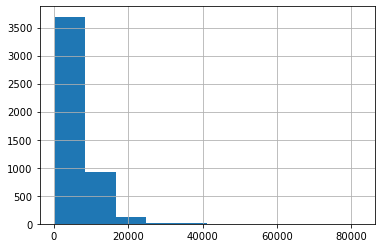

In [4]:
# umber of characters present in each sentence
df.article.str.len().hist()

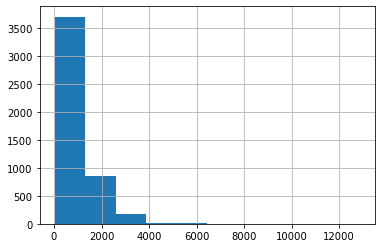

In [5]:
# number of words appearing in each article
df.article.str.split().map(lambda x: len(x)).hist()

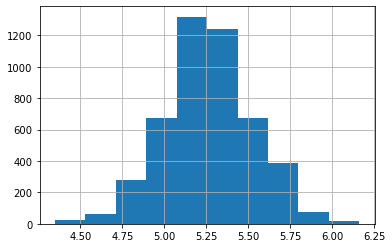

In [6]:
#the average word length in each sentence.
df.article.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [7]:
stop = set(stopwords.words('english'))

In [8]:
corpus = [] 
article = df.article.str.split()
article = article.values.tolist()
corpus = [word for i in article for word in i]

In [9]:
dictionary = defaultdict(int)

In [10]:
for word in corpus:
    if word in stop:
        dictionary[word] +=1

<BarContainer object of 10 artists>

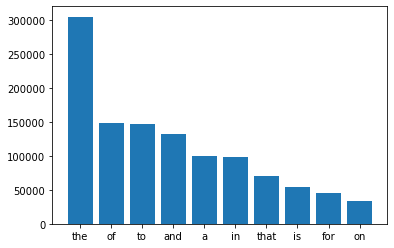

In [11]:
top=sorted(dictionary.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [12]:
"""
we know which stopwords occur frequently in our text,
let’s inspect which words other than these stopwords
occur frequently.
"""

'\nwe know which stopwords occur frequently in our text,\nlet’s inspect which words other than these stopwords\noccur frequently.\n'

In [13]:
counter = Counter(corpus)
most = counter.most_common()

In [14]:
x,y = [],[]

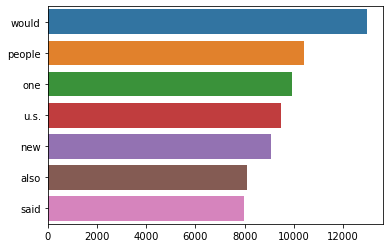

In [15]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [16]:
len(corpus)


4999681

In [17]:
text = " ".join(corpus)

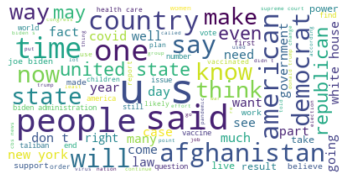

In [18]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
wordcloud.to_file("img/cloud.png")

In [20]:
x_label = df.label.value_counts()
y_label = x_label.sort_index()

/home/kostrovy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


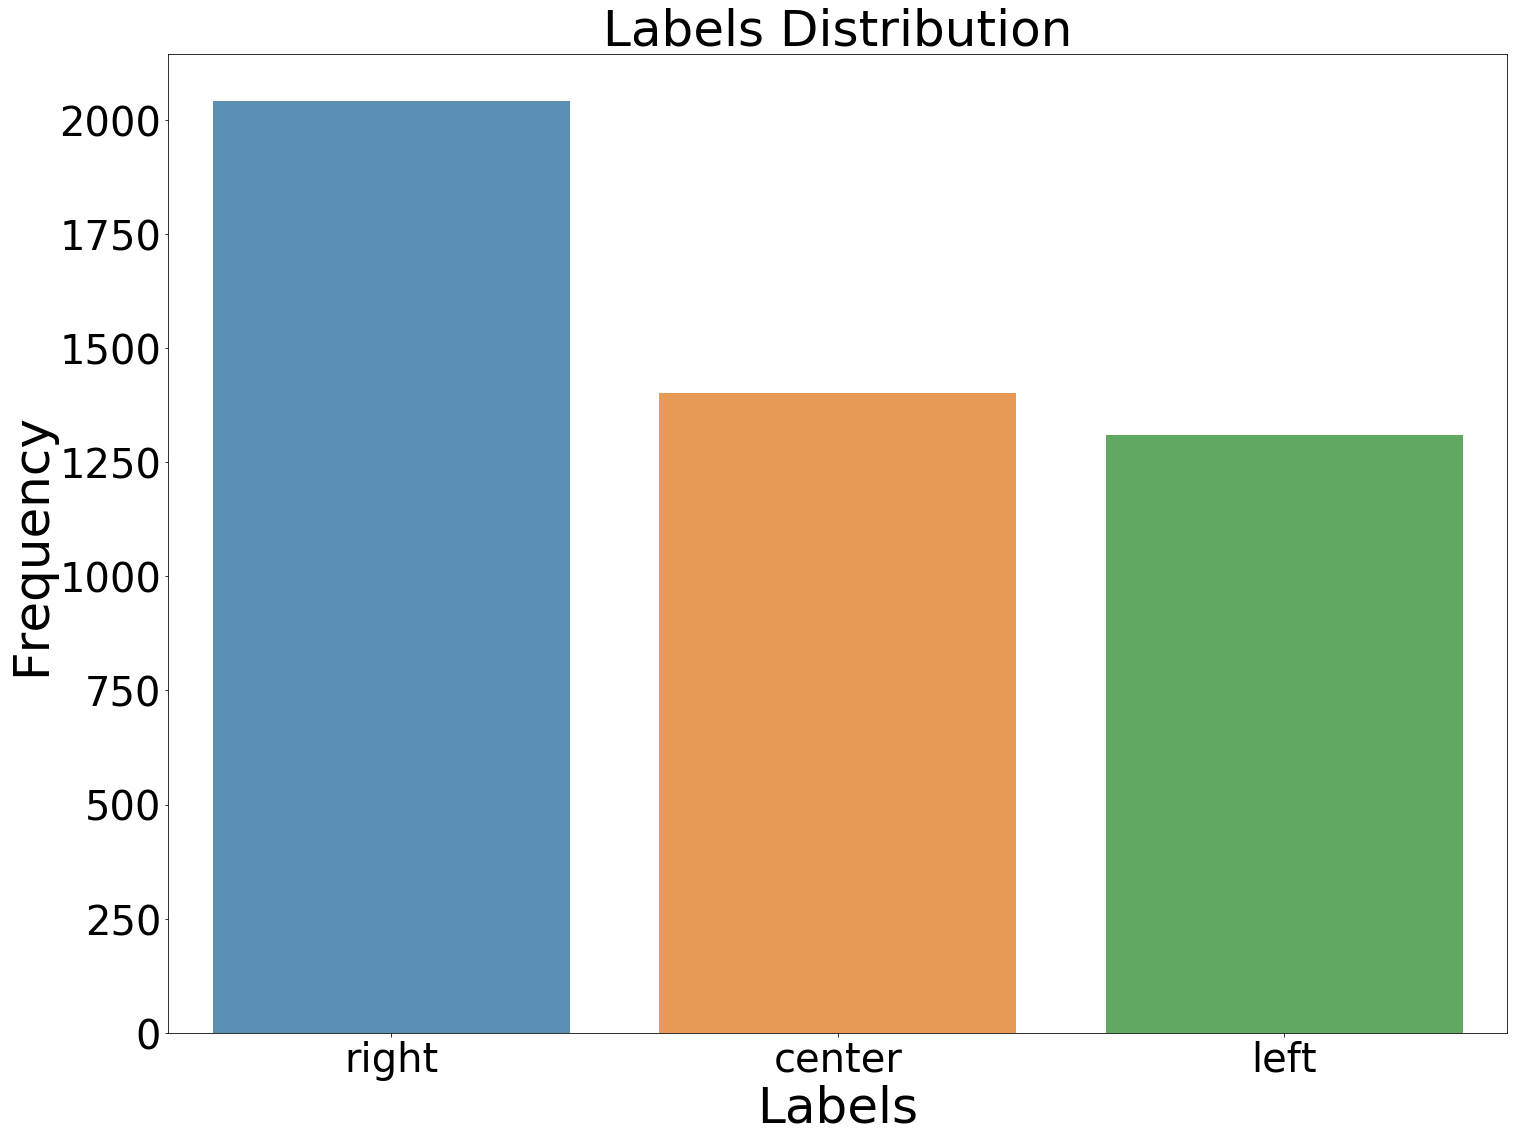

In [21]:
plt.figure(figsize=(24,18))
sns.barplot(x_label.index, x_label.values, alpha=0.8)
plt.title("Labels Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Labels', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

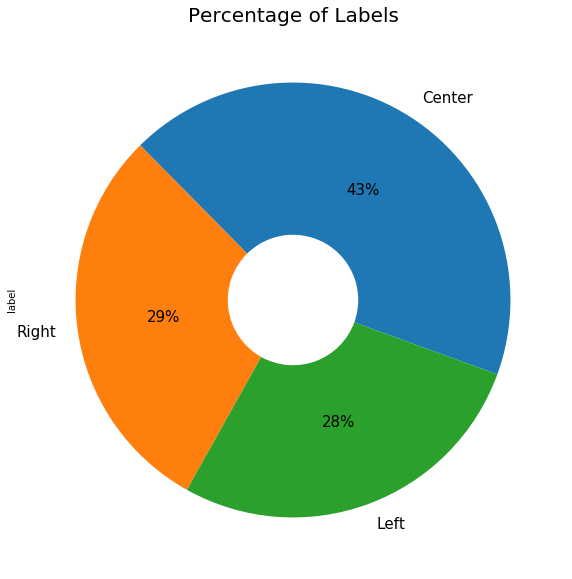

In [22]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.label.value_counts().plot(kind='pie', labels=['Center', 'Right', 'Left'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [23]:
df['word_count'] = df.article.apply(lambda x: len(str(x).split()))

In [24]:
df['sentiment'] = df.article.apply(lambda x: TextBlob(x).sentiment.polarity)

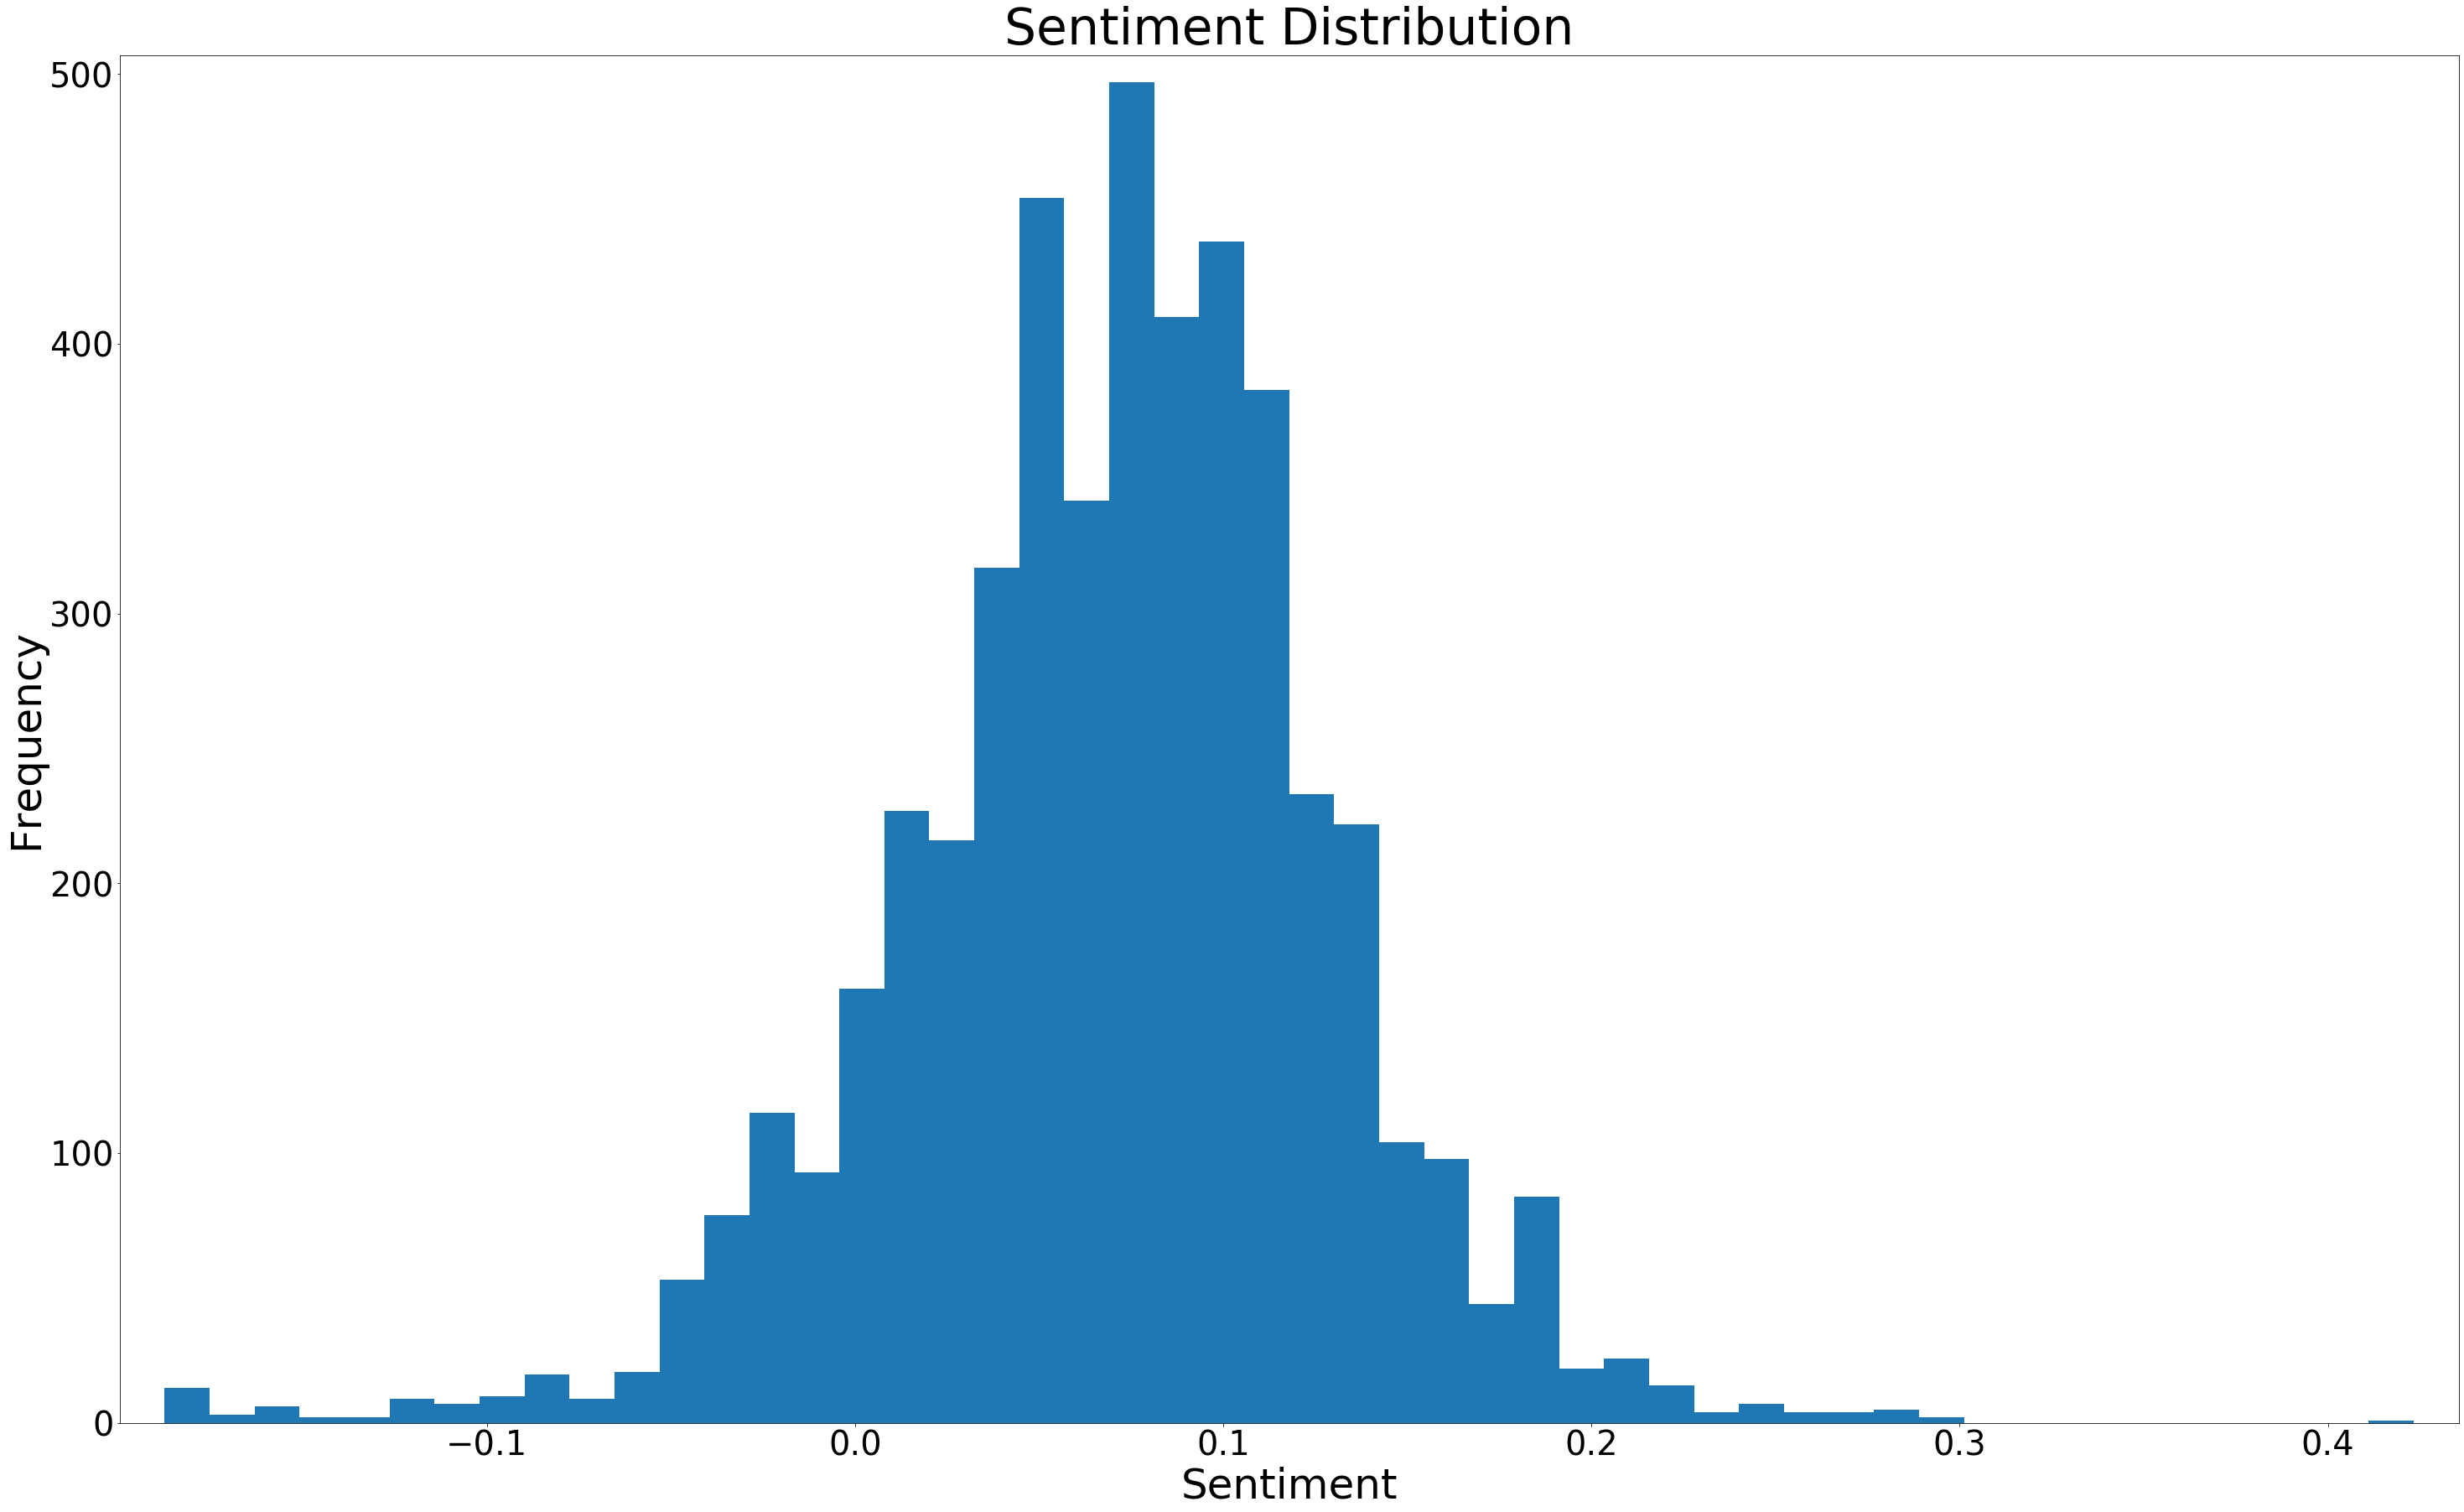

In [25]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

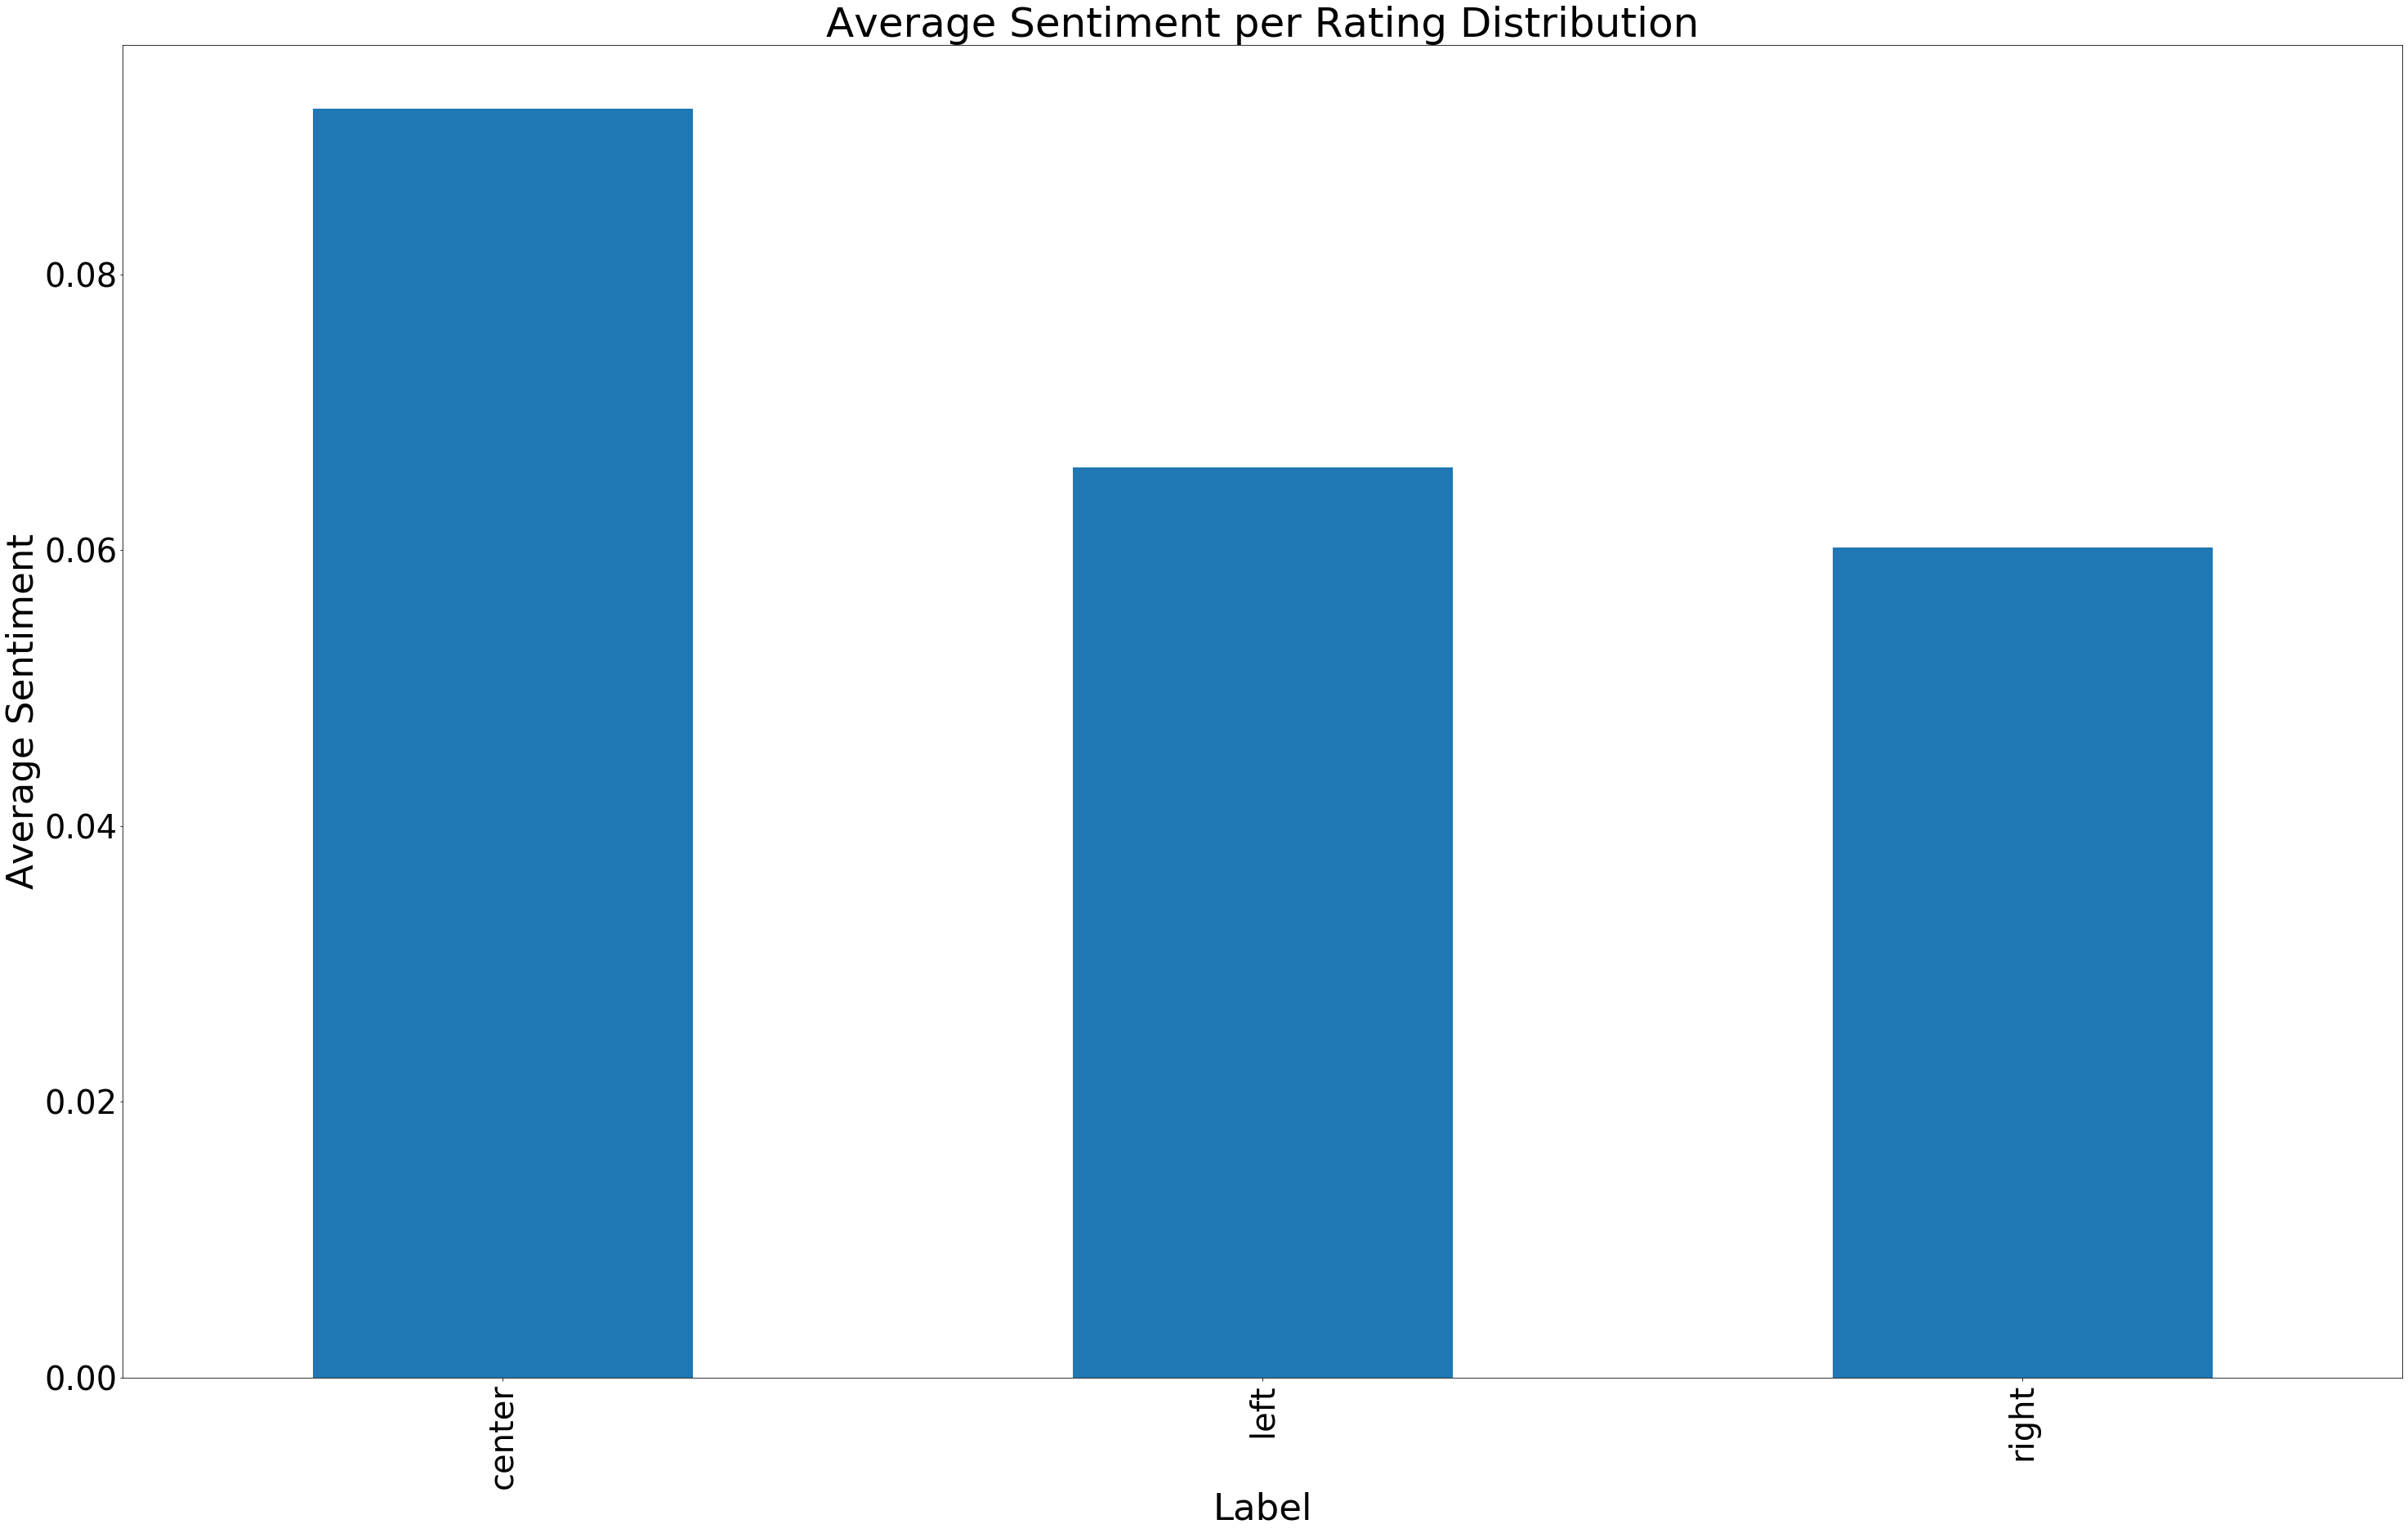

In [26]:
polarity_avg = df.groupby('label')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Label', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [27]:
df['article_len'] = df.article.apply(lambda x:len(x))

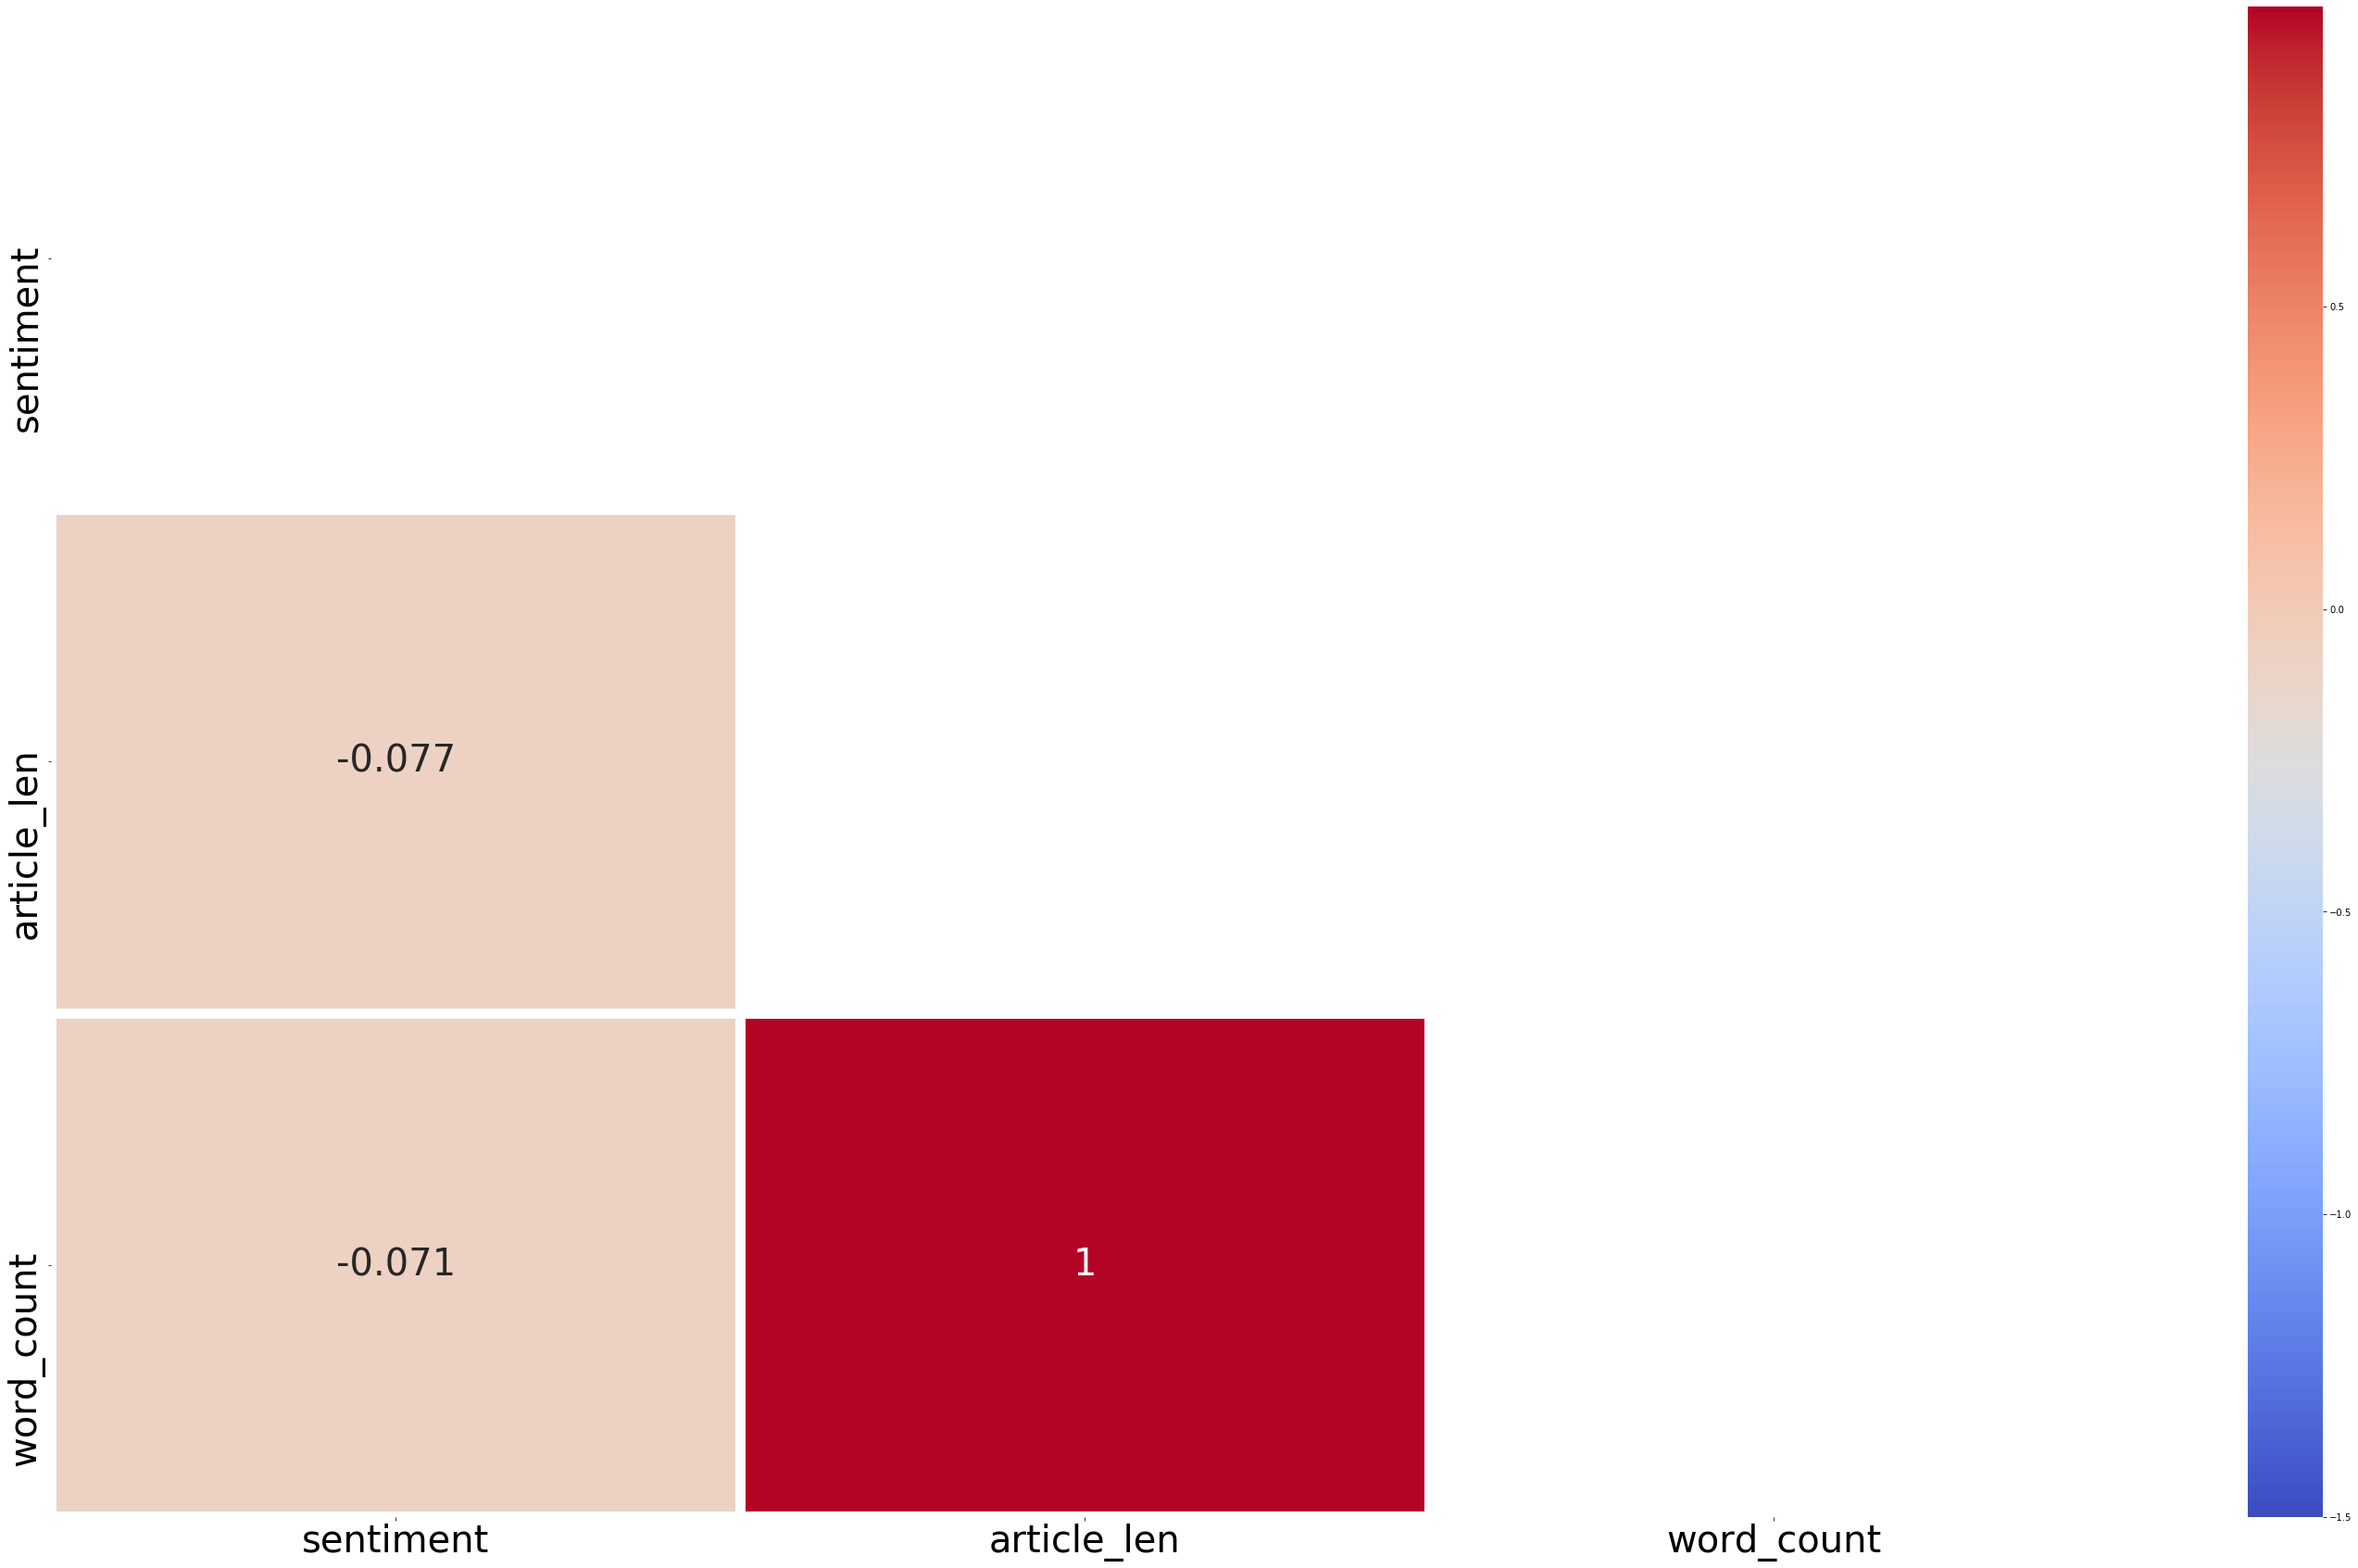

In [28]:
correlation = df[['label','sentiment', 'article_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

# NEW SECTION

In [29]:
df.article.head()

0    mental health professionals are no substitute ...
1    merrick garland's focus on school board meetin...
2    the president has yet to clarify what victory ...
3    to hear president joe biden tell it, the ameri...
4    the mainstream media's honeymoon with presiden...
Name: article, dtype: object

In [30]:

del(df)

In [31]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.metrics import precision_score
import gensim

In [32]:
df = pd.read_csv('data/test.csv')

In [33]:
def modify(text):
    text = text.replace("SHARE","")
    text = text.lower()
    text = re.sub(r'\d+', '', string=text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = " ".join([i for i in tokens if not i in stop_words])
    text  = word_tokenize(text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text])
    return text

In [34]:
a = modify("been had done languages cities mice")
a

'done language city mouse'

In [35]:
df['cleaned'] = df.article.apply(modify)

In [36]:
df.head()

,article,label,cleaned
0,The president has yet to clarify what victory ...,right,president yet clarify victory pandemic look li...
1,"SHARETo hear President Joe Biden tell it, the ...",right,hear president joe biden tell american evacuat...
2,SHAREThe mainstream media's honeymoon with Pre...,right,mainstream medias honeymoon president joe bide...
3,"The ""Squad"" makes a demand for which there is ...",right,squad make demand military solution better par...
4,The restraint crowd delivers America's humilia...,right,restraint crowd delivers america humiliation a...


# NEW SECTION

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.cleaned, df.label, test_size = 0.2, random_state = 42)

In [38]:
count_NB_clf = Pipeline([
    ('countVect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [39]:
count_NB_clf.fit(X_train, y_train)

Pipeline(steps=[('countVect', CountVectorizer()), ('clf', MultinomialNB())])

In [40]:
def print_scores(clf, X_test, y_true):
    y_preds = clf.predict(X_test)
    print("*"*50)
    print("confusion matrix:\n", confusion_matrix(y_true, y_preds), "\n")
    print("*"*50)
    print("f1:\n", f1_score(y_true, y_preds, average='weighted'), "\n")
    print("*"*50)
    print("precision:\n", precision_score(y_true, y_preds, average='weighted'), "\n")
    print("*"*50)
    print("recall:\n", recall_score(y_true, y_preds, average='weighted'), "\n")
    

In [41]:
print_scores(count_NB_clf, X_test, y_test)

**************************************************
confusion matrix:
 [[204  31   0]
 [ 11 164   6]
 [  0  21 262]] 

**************************************************
f1:
 0.9037778465921285 

**************************************************
precision:
 0.9113974953025036 

**************************************************
recall:
 0.9012875536480687 



In [42]:
count_LR_clf = Pipeline([
    ('countVect', CountVectorizer()),
    ('clf', SGDClassifier(max_iter=10000))
])

In [43]:
count_LR_clf.fit(X_train, y_train)

Pipeline(steps=[('countVect', CountVectorizer()),
                ('clf', SGDClassifier(max_iter=10000))])

In [44]:
print_scores(count_LR_clf, X_test, y_test)

**************************************************
confusion matrix:
 [[232   1   2]
 [  8 164   9]
 [  0   7 276]] 

**************************************************
f1:
 0.9610906376934567 

**************************************************
precision:
 0.9612322920172154 

**************************************************
recall:
 0.9613733905579399 



In [45]:
listModels = [MultinomialNB(), SGDClassifier(), RandomForestClassifier()]
listModels

[MultinomialNB(), SGDClassifier(), RandomForestClassifier()]

In [46]:
count_RF_clf = Pipeline([
    ('countVect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

In [47]:
count_RF_clf.fit(X_train, y_train)

Pipeline(steps=[('countVect', CountVectorizer()),
                ('clf', RandomForestClassifier())])

In [48]:
print_scores(count_RF_clf, X_test, y_test)

**************************************************
confusion matrix:
 [[230   5   0]
 [  3 177   1]
 [  0  17 266]] 

**************************************************
f1:
 0.963285947460332 

**************************************************
precision:
 0.9655282883864797 

**************************************************
recall:
 0.9628040057224606 



In [49]:
for clf in listModels:
    print(f"Current Model: {str(clf)}")
    pipeLine = Pipeline([
        ('countVect', CountVectorizer()),
        (str(clf), clf)])
    pipeLine.fit(X_train, y_train)
    print(f"For {str(clf)} we achieve")
    print_scores(pipeLine, X_test, y_test)

Current Model: MultinomialNB()
For MultinomialNB() we achieve
**************************************************
confusion matrix:
 [[204  31   0]
 [ 11 164   6]
 [  0  21 262]] 

**************************************************
f1:
 0.9037778465921285 

**************************************************
precision:
 0.9113974953025036 

**************************************************
recall:
 0.9012875536480687 

Current Model: SGDClassifier()
For SGDClassifier() we achieve
**************************************************
confusion matrix:
 [[231   3   1]
 [  9 162  10]
 [  0   7 276]] 

**************************************************
f1:
 0.9567409020917015 

**************************************************
precision:
 0.9568205354657742 

**************************************************
recall:
 0.9570815450643777 

Current Model: RandomForestClassifier()
For RandomForestClassifier() we achieve
**************************************************
confusion matrix:
 [[229 

In [50]:
for clf in listModels:
    print(f"Current Model: {str(clf)}")
    pipeLine = Pipeline([
        ('countVect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        (str(clf), clf)])
    pipeLine.fit(X_train, y_train)
    print(f"For {str(clf)} we achieve")
    print_scores(pipeLine, X_test, y_test)

Current Model: MultinomialNB()
For MultinomialNB() we achieve
**************************************************
confusion matrix:
 [[227   1   7]
 [ 53  70  58]
 [  0   0 283]] 

**************************************************
f1:
 0.8033883614278571 

**************************************************
precision:
 0.8570949441572395 

**************************************************
recall:
 0.8297567954220315 

Current Model: SGDClassifier()
For SGDClassifier() we achieve
**************************************************
confusion matrix:
 [[231   4   0]
 [  2 177   2]
 [  0   7 276]] 

**************************************************
f1:
 0.978668596506541 

**************************************************
precision:
 0.9790506950831034 

**************************************************
recall:
 0.9785407725321889 

Current Model: RandomForestClassifier()
For RandomForestClassifier() we achieve
**************************************************
confusion matrix:
 [[230  

# NEW SECTION 

In [51]:
def read_corpus(texts, tokens_only = False):
    for i in range(len(texts)):
        tokens = gensim.utils.simple_preprocess(texts.iloc[i])
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [52]:
train_corpus = list(read_corpus(X_train))

In [53]:
#print(train_corpus[:1])

In [54]:
test_corpus = list(read_corpus(X_test, tokens_only=True))
print(len(test_corpus))
#print(test_corpus[:1])

699


In [55]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [56]:
model.build_vocab(train_corpus)

In [57]:
print(f"Word 'penalty' appeared {model.wv.get_vecattr('penalty', 'count')} times in the training corpus.")

Word 'penalty' appeared 155 times in the training corpus.


In [58]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [59]:
from tqdm import tqdm
import multiprocessing
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [60]:
cores = multiprocessing.cpu_count()

In [61]:
X_for_tr = [model.infer_vector(x.words) for x in train_corpus]

In [62]:
X_for_test = [model.infer_vector(x) for x in test_corpus]

In [63]:
logreg = SGDClassifier(n_jobs=-1)

In [64]:
logreg.fit(X_for_tr, y_train)

SGDClassifier(n_jobs=-1)

In [65]:
print_scores(logreg, X_for_test, y_test)

**************************************************
confusion matrix:
 [[206  28   1]
 [ 23 158   0]
 [  6  16 261]] 

**************************************************
f1:
 0.8961283195355578 

**************************************************
precision:
 0.9005638122374634 

**************************************************
recall:
 0.894134477825465 



# New Section

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SpatialDropout1D, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.preprocessing import LabelBinarizer

In [67]:
[X, y] = [df.article, df.label]
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [69]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)

In [70]:
tokenizer.fit_on_texts(X_train.values)

In [71]:
word_index = tokenizer.word_index

In [72]:
print(f'Found {len(word_index)} unique tokens')

Found 41801 unique tokens


In [73]:
X_train_deep = tokenizer.texts_to_sequences(X_train.values)

In [74]:
X_test_deep = tokenizer.texts_to_sequences(X_test.values)

In [75]:
X_train_deep = pad_sequences(X_train_deep, maxlen=MAX_SEQUENCE_LENGTH)
X_test_deep = pad_sequences(X_test_deep, maxlen=MAX_SEQUENCE_LENGTH)
print(f'SHape of data tensor: {X_train_deep.shape}')

SHape of data tensor: (2793, 250)


In [76]:
lb = LabelBinarizer()
y_train_deep = lb.fit_transform(y_train.values)
y_train_deep[1]

array([0, 0, 1])

In [77]:
y_test_deep = lb.transform(y_test.values)
y_test_deep[1]

array([0, 0, 1])

In [78]:
y_train_deep

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [79]:
def buildModel():
    optimizer = tf.keras.optimizers.Adam()
    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train_deep.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
    #model.add(Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [80]:
X_train_deep.shape, y_train.shape

((2793, 250), (2793,))

In [81]:
epochs = 10
batch_size = 48
model = buildModel()
history = model.fit(X_train_deep, y_train_deep, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
47/47 [==============================] - 28s 555ms/step - loss: 0.9607 - accuracy: 0.6531 - val_loss: 2.2741 - val_accuracy: 0.6047
Epoch 2/10
47/47 [==============================] - 26s 558ms/step - loss: 0.6232 - accuracy: 0.7869 - val_loss: 0.3680 - val_accuracy: 0.9356
Epoch 3/10
47/47 [==============================] - 25s 538ms/step - loss: 0.1939 - accuracy: 0.9566 - val_loss: 0.1465 - val_accuracy: 0.9624
Epoch 4/10
47/47 [==============================] - 26s 551ms/step - loss: 0.0489 - accuracy: 0.9884 - val_loss: 0.1066 - val_accuracy: 0.9714
Epoch 5/10
47/47 [==============================] - 26s 546ms/step - loss: 0.0113 - accuracy: 0.9987 - val_loss: 0.1002 - val_accuracy: 0.9696
Epoch 6/10
47/47 [==============================] - 26s 550ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.1009 - val_accuracy: 0.9624
Epoch 7/10
47/47 [==============================] - 26s 552ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.1243 - val_accuracy: 0.9732

In [82]:
accr = model.evaluate(X_test_deep, y_test_deep)
print(f'Test set \n Loss {accr[0]:0.3f} Accuracy {accr[1]:0.3f}')

22/22 [==============================] - 1s 47ms/step - loss: 0.0701 - accuracy: 0.9800
Test set 
 Loss 0.070 Accuracy 0.980


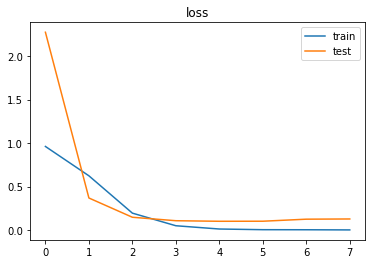

In [83]:
plt.title('loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

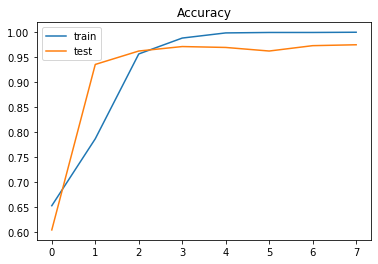

In [84]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [85]:
y_preds = model.predict(X_test_deep)

In [86]:
y_preds = model.predict_classes(X_test_deep)

/usr/lib/python3/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [87]:
y_preds = np.argmax(model.predict(X_test_deep), axis=1)

In [88]:
y_preds = [lb.classes_[i] for i in y_preds]

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds,average=None).mean())
print(recall_score(y_test, y_preds,average=None).mean())

[[234   1   0]
 [  0 180   1]
 [  1  11 271]]
0.9799713876967096
0.976522736754276
0.9826056640391624


In [91]:
X = df.article
y = df.label
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(X)
lb = LabelBinarizer()
lb.fit(y)
def preprocess(X,y):
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
    y = lb.transform(y)
    return X, y
X, y = preprocess(X, y)
print(X.shape, y.shape)


(3492, 250) (3492, 3)


In [92]:
epochs = 5
batch_size = 128
model = buildModel()
history = model.fit(X, y, epochs=epochs, batch_size=batch_size,callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.0001)])

Epoch 1/5
28/28 [==============================] - 18s 592ms/step - loss: 0.9014 - accuracy: 0.6355
Epoch 2/5
28/28 [==============================] - 16s 588ms/step - loss: 0.5410 - accuracy: 0.7924
Epoch 3/5
28/28 [==============================] - 17s 602ms/step - loss: 0.2326 - accuracy: 0.9633
Epoch 4/5
28/28 [==============================] - 17s 597ms/step - loss: 0.0486 - accuracy: 0.9857
Epoch 5/5
28/28 [==============================] - 17s 599ms/step - loss: 0.0129 - accuracy: 0.9974


In [93]:
accr = model.evaluate(X, y)
print(f'Test set \n Loss {accr[0]:0.3f} Accuracy {accr[1]:0.3f}')

110/110 [==============================] - 6s 51ms/step - loss: 0.0030 - accuracy: 1.0000
Test set 
 Loss 0.003 Accuracy 1.000


In [94]:
tr = """
Members of the Squad did not respond when asked to comment on the historic Virginia lieutenant governor election of Winsome Sears, who will be the first woman Lt. Gov., the first Black woman elected statewide, and the first naturalized citizen to hold the position.

Fox News reached out to the press secretaries of Rep. Alexandria Ocasio-Cortez, Rashida Tlaib, Cori Bush and Ayanna Pressley, as well as Ilhan Omar's chief of staff, requesting comment on Sears’ win early Wednesday. None of the spokespeople responded to the requests by close of business Wednesday. 
"I'm telling you that what you are looking at is the American dream," Sears, a Republican, said early Wednesday morning during her victory speech. 
placeholder

WINSOME SEARS SAYS SHE WOULD DIE FOR AMERICA, STARTS 'USA' CHANT DURING VICTORY SPEECH: 'AMERICAN DREAM'

Sears, a Marine Corps veteran, immigrated to the United States from Jamaica as a child, and previously served a single term in Virginia’s House of Delegates from 2002 to 2004. 

Her 2021 run for lieutenant governor marked her return to politics after her term in the House of Delegates. 
Former Republican Delegate Winsome Sears celebrates winning the race for Lt. Governor of Virginia .(REUTERS/ Jonathan Ernst)

Former Republican Delegate Winsome Sears celebrates winning the race for Lt. Governor of Virginia .(REUTERS/ Jonathan Ernst) (REUTERS/ Jonathan Ernst)

"In case you haven't noticed, I am Black. And I have been Black all my life, but that's not what this is about," she continued. 

"What we are going to do now is be about the business of the Commonwealth," she said. "We have things to tend to. We are going to fully fund our historically Black colleges and universities. We’re going to have safer neighborhoods, safer communities, and our children are going to get a good education."

WINSOME SEARS, VIRGINIA GOP LIEUTENANT GOVERNOR CANDIDATE: WHAT TO KNOW
Former Republican Delegate Winsome Sears celebrates winning the race for Lt. Governor of Virginia as she introduces Republican candidate for Governor Glenn Youngkin during an election night party in Chantilly Virginia, U.S., November 3, 2021. REUTERS/ Jonathan Ernst

Former Republican Delegate Winsome Sears celebrates winning the race for Lt. Governor of Virginia as she introduces Republican candidate for Governor Glenn Youngkin during an election night party in Chantilly Virginia, U.S., November 3, 2021. REUTERS/ Jonathan Ernst (REUTERS/ Jonathan Ernst)

Fox News examined the Twitter feeds belonging to the Squad members and also found no tweets concerning Sears’ historic win, despite their history of supporting other women and women of color running for office. 
"""

In [95]:
y =['right']

In [96]:
X, y = preprocess([tr], y)

In [97]:
pred = np.argmax(model.predict(X), axis=1)[0]
pred

1

In [98]:
lb.classes_[pred]

'left'